# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
/Users/samuelwytenburg/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [72]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_BOX_PUBLIC")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!
dwelling_types = to_data.groupby("year").sum()[["single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house",
                              "row_house", "duplex","apartment_five_storeys_less","other_house"]]

In [5]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
dwelling_types.to_csv("dwelling_types.csv")

In [6]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel="Dwelling Type", ylabel="Dwelling Type Units", color="Red"):
    """
    Create a barplot based in the data argument.
    """
    fig, ax = plt.subplots()
    ax = data.plot(kind="bar", title=f"Dwelling Types in Toronto in {title}", color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax
    

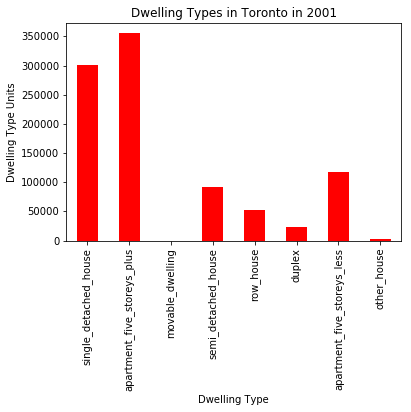

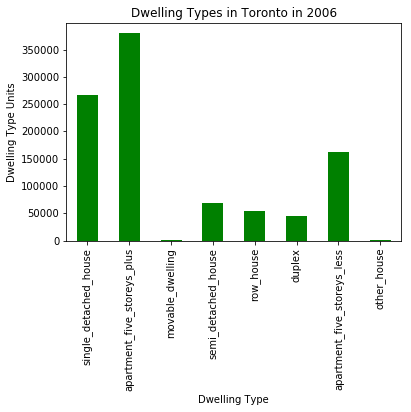

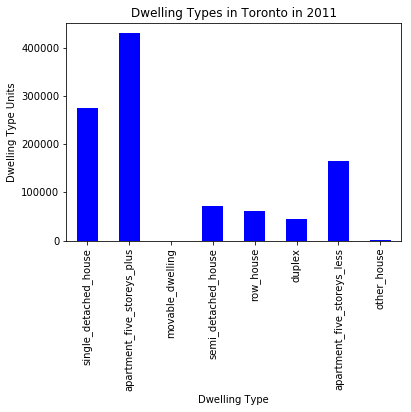

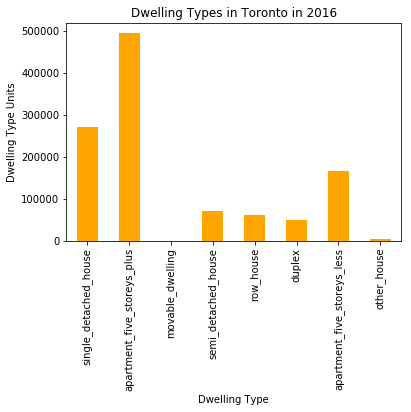

In [8]:
# Create a bar chart per year to show the number of dwelling types
list_of_years=[2001,2006,2011,2016]
colors = ["Red", "Green", "Blue", "Orange"]


  
# Bar chart for 2001
# YOUR CODE HERE!
create_bar_chart(dwelling_types.loc[list_of_years[0]], title = list_of_years[0], color=colors[0])

# Bar chart for 2006
# YOUR CODE HERE!
create_bar_chart(dwelling_types.loc[list_of_years[1]], title = list_of_years[1], color=colors[1] )
# Bar chart for 2011
# YOUR CODE HERE!
create_bar_chart(dwelling_types.loc[list_of_years[2]], title = list_of_years[2], color=colors[2] )
# Bar chart for 2016
# YOUR CODE HERE!
create_bar_chart(dwelling_types.loc[list_of_years[3]], title = list_of_years[3], color=colors[3] )

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
shelter_costs = to_data.groupby("year")[["shelter_costs_owned","shelter_costs_rented"]].mean()

In [16]:
# Helper create_line_chart function
def create_line_chart(data, title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", xlabel="Year", ylabel="Average Monthly Shelter Costs", color="Blue"):
    """
    Create a line chart based in the data argument.
    """
    ax = data.plot(kind="line", title=title, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

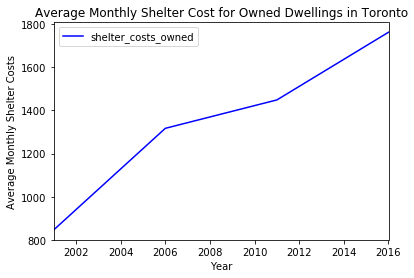

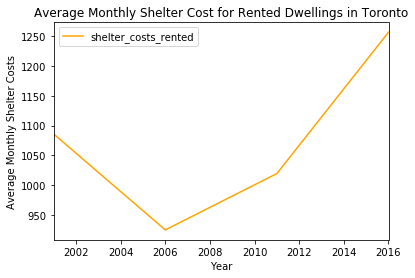

In [17]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
# YOUR CODE HERE!
create_line_chart(shelter_costs[["shelter_costs_owned"]])
# Line chart for rented dwellings
# YOUR CODE HERE!
create_line_chart(shelter_costs[["shelter_costs_rented"]],title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", color="Orange")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [18]:
# Calculate the average house value per year
# YOUR CODE HERE!
to_data.groupby('year')[['average_house_value']].mean()

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

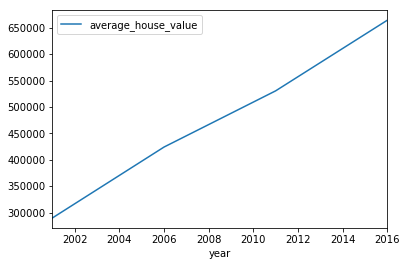

In [19]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!
to_data.groupby('year')[['average_house_value']].mean().plot()

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [28]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!
neighbourhood_data = to_data.groupby(['year','neighbourhood'])[['average_house_value']].mean()

In [29]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
neighbourhood_data.hvplot.line(groupby = 'neighbourhood')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [39]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!
dwelling_type = to_data.iloc[:,:9]

In [40]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
dwelling_type.hvplot.bar(groupby='neighbourhood',rot=90, height=500, width=1000)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [47]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_10 = to_data.groupby('neighbourhood').mean()
top_10 = top_10.sort_values('average_house_value', ascending=False)
top_10 = top_10.iloc[0:10]
top_10

single_detached_house  \
neighbourhood                                              
Bridle Path-Sunnybrook-York Mills                2260.00   
Forest Hill South                                1742.50   
Lawrence Park South                              3472.50   
Rosedale-Moore Park                              2498.75   
St.Andrew-Windfields                             3225.00   
Casa Loma                                         916.25   
Bedford Park-Nortown                             4865.00   
Forest Hill North                                1488.75   
Kingsway South                                   2326.25   
Yonge-St.Clair                                    565.00   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   
Casa Loma                                              2310.00   
Bedford Park-Nortown                                   1981.25   
Forest Hill North                                      3392.50   
Kingsway South                                          576.25   
Yonge-St.Clair                                         3948.75   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   
Casa Loma                                      0.00               288.75   
Bedford Park-Nortown                           0.00                43.75   
Forest Hill North                              0.00                12.50   
Kingsway South                                 0.00                66.25   
Yonge-St.Clair                                 0.00               425.00   

                                   row_house  duplex  \
neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   
Casa Loma                             201.25   162.5   
Bedford Park-Nortown                   57.50   287.5   
Forest Hill North                      16.25    82.5   
Kingsway South                         48.75    20.0   
Yonge-St.Clair                        212.50   172.5   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   
Casa Loma                                              1192.50         2.50   
Bedford Park-Nortown                                   1275.00        88.75   
Forest Hill North                                       402.50         1.25   
Kingsway South                                          336.25         2.50   
Yonge-St.Clair                                         1308.75    

In [54]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_10['average_house_value'].hvplot.bar(rot=45,height=500, title = "Average house price, Top 10 most expensive")


:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [58]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()
df_neighbourhood_locations = df_neighbourhood_locations.set_index('neighbourhood')
df_neighbourhood_locations

lat        lon
neighbourhood                                          
Agincourt North                    43.805441 -79.266712
Agincourt South-Malvern West       43.788658 -79.265612
Alderwood                          43.604937 -79.541611
Annex                              43.671585 -79.404001
Banbury-Don Mills                  43.737657 -79.349718
Bathurst Manor                     43.764813 -79.456055
Bay Street Corridor                43.657511 -79.385721
Bayview Village                    43.776361 -79.377117
Bayview Woods-Steeles              43.796802 -79.382118
Bedford Park-Nortown               43.731486 -79.420227
Beechborough-Greenbrook            43.693216 -79.479473
Bendale                            43.760366 -79.257400
Birchcliffe-Cliffside              43.694682 -79.265093
Black Creek                        43.764890 -79.521979
Blake-Jones                        43.676173 -79.337394
Briar Hill-Belgravia               43.699024 -79.452851
Bridle Path-Sunnybrook-York Mills  43.731013 -79.378904
Broadview North                    43.688825 -79.355630
Brookhaven-Amesbury                43.701326 -79.485589
Cabbagetown-South St.James Town    43.667648 -79.366107
Caledonia-Fairbank                 43.688569 -79.455212
Casa Loma                          43.681852 -79.408007
Centennial Scarborough             43.782376 -79.150843
Church-Yonge Corridor              43.659649 -79.379017
Clairlea-Birchmount                43.713592 -79.281382
Clanton Park                       43.741978 -79.446303
Cliffcrest                         43.721121 -79.235530
Corso Italia-Davenport             43.677661 -79.447469
Danforth                           43.684025 -79.329819
Danforth-East York                 43.689468 -79.331403
...                                      ...        ...
South Riverdale                    43.649292 -79.335651
St.Andrew-Windfields               43.756246 -79.379037
Steeles                            43.812959 -79.321207
Stonegate-Queensway                43.635518 -79.501128
Tam O'Shanter-Sullivan             43.780130 -79.302919
Taylor-Massey                      43.694998 -79.295901
The Beaches                        43.671050 -79.299601
Thistletown-Beaumond Heights       43.737988 -79.563491
Thorncliffe Park                   43.707749 -79.349984
Trinity-Bellwoods                  43.650176 -79.415342
University                         43.662506 -79.401180
Victoria Village                   43.728489 -79.314874
Waterfront Communities-The Island  43.633880 -79.377202
West Hill                          43.767490 -79.176676
West Humber-Clairville             43.716180 -79.596356
Westminster-Branson                43.778813 -79.452418
Weston                             43.702716 -79.515723
Weston-Pellam Park                 43.673962 -79.460244
Wexford/Maryvale                   43.748572 -79.298637
Willowdale East                    43.770602 -79.401484
Willowdale West                    43.771210 -79.427558
Willowridge-Martingrove-Richview   43.683645 -79.554221
Woburn                             43.766740 -79.228586
Woodbine Corridor                  43.676773 -79.315407
Woodbine-Lumsden                   43.694107 -79.311164
Wychwood                           43.676919 -79.425515
Yonge-Eglinton                     43.704689 -79.403590
Yonge-St.Clair                     43.687859 -79.397871
York University Heights            43.765736 -79.488883
Yorkdale-Glen Park                 43.714672 -79.457108

[140 rows x 2 columns]

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [70]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
df_average = to_data.groupby('neighbourhood').mean()

In [76]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!
df_new = pd.concat([df_average, df_neighbourhood_locations], join="inner", axis=1)
df_new = df_new.reset_index()
df_new.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented        lat  \
0             329811.5              1109.00                983.50  43.805441   
1             334189.0              1131.25                985.00  43.788658   
2             427922.5              1166.75               1003.25  43.604937   
3             746977.0              1692.75               1315.25  43.671585   
4             612039.0              1463.50               1242.75  43.737657   

         lon  
0 -79.266712  
1 -79.265612  
2 -79.541611  
3 -79.404001  
4 -79.349718

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

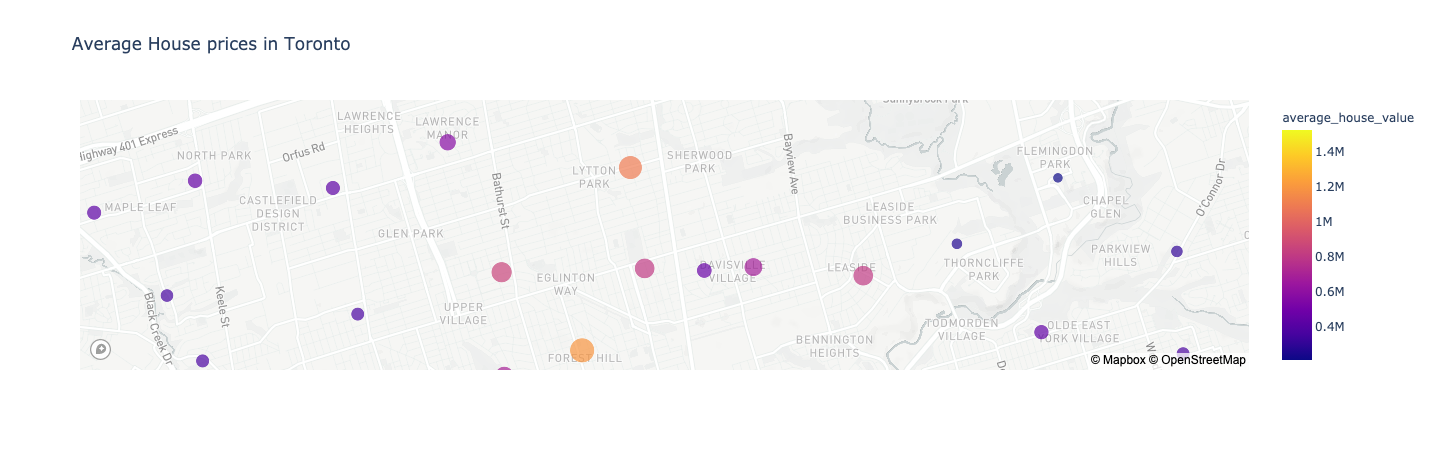

In [98]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!
map_plot = px.scatter_mapbox(
    df_new,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    hover_name='neighbourhood',
    hover_data=df_new.columns[0:-2],
    zoom=12,
    title='Average House prices in Toronto'
)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

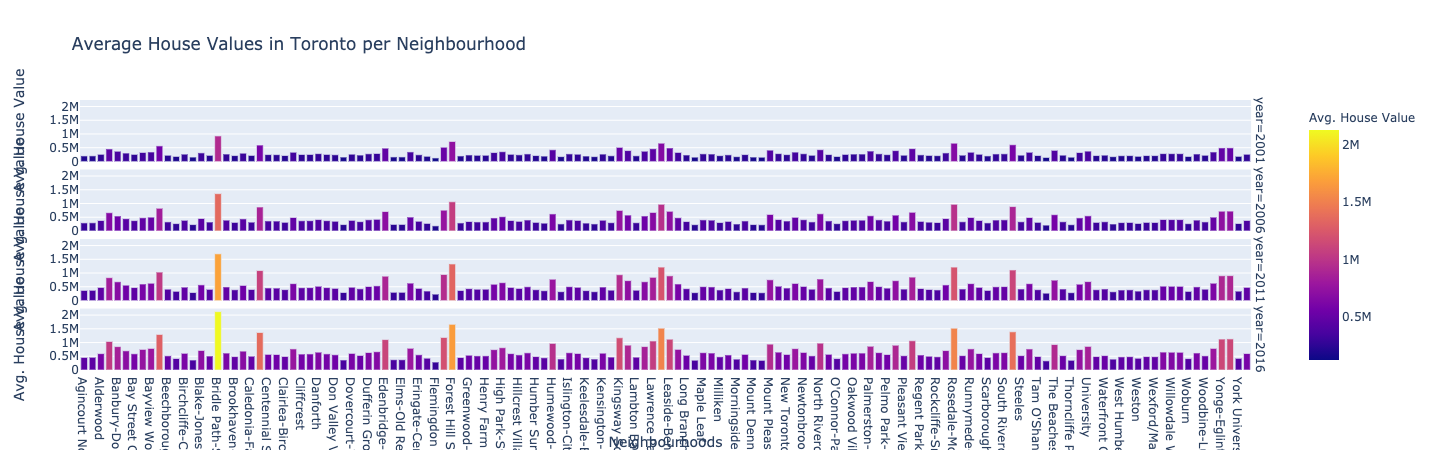

In [23]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [24]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

year                      neighbourhood  single_detached_house  \
0  2001               Bedford Park-Nortown                   4985   
1  2001  Bridle Path-Sunnybrook-York Mills                   2275   
2  2001                          Casa Loma                   1035   
3  2001                  Forest Hill North                   1565   
4  2001                  Forest Hill South                   1815   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         2080                 0                   45   
1                          110                 0                   25   
2                         1700                 0                  415   
3                         3380                 0                   10   
4                         2440                 5                   65   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0         40     210                         1235           15   
1         15      10                           20            0   
2        190     185                         1090            5   
3          0       0                          485            5   
4         45      85                         1010           15   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               565304                  933                  1491  
1               927466                 1983                  1790  
2               596077                 1241                  1500  
3               517466                  940                  1428  
4               726664                 1001                  1469

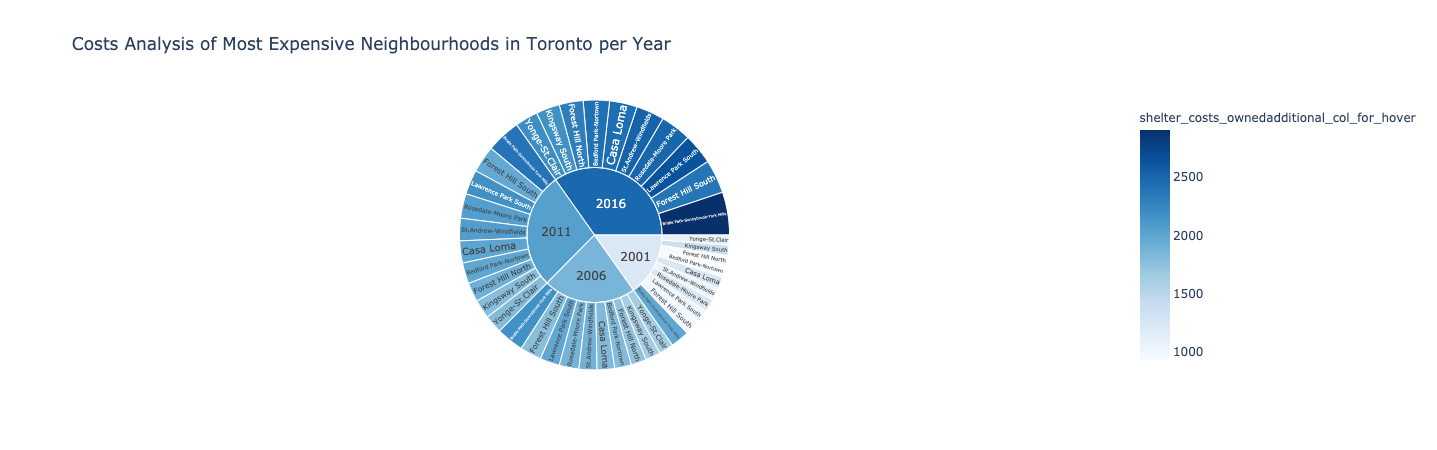

In [25]:
# Create the sunburst chart
# YOUR CODE HERE!